Мое видение:
В алгоритме случайного леса мы создаём множество случайных выборок на основе нашей генеральной  путем того, что мы выбираем случайный фрагмент нашей генеральной выборки, а также можем добавить похожие значения.  Затем мы строим N-ое  количество решающих деревьев,  также добавляем некоторую случайность при разбиении наших выборок в процессе построения дерева(bootstrap).  Таким образом мы получаем N решающих деревьев которые не похожи друг на друга.  Затем мы получаем решение наших деревьев и с помощью голосования выбираем самый наиболее встречающийся ответ для нашей классификации (bagging). Главной проблемой этого алгоритма является то, что он громоздкий, долго работает и не интерпретируемый. Ещё такие неинтерпретируемые  алгоритмы называют чёрным ящиком, так как мы не можем до конца быть уверенным, что происходит внутри этого алгоритма, так как мы выбираем случайные выборки и случайные методы разбиения выборок.
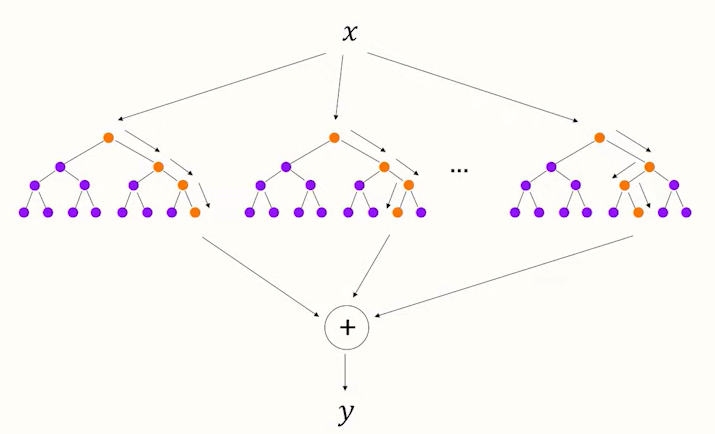

In [4]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles

In [6]:
X, y = make_circles(n_samples =5000, noise =0.06 , random_state =42)
X_tr , X_t , y_tr , y_t = train_test_split(X, y, test_size =0.3,
random_state =42, stratify=y)

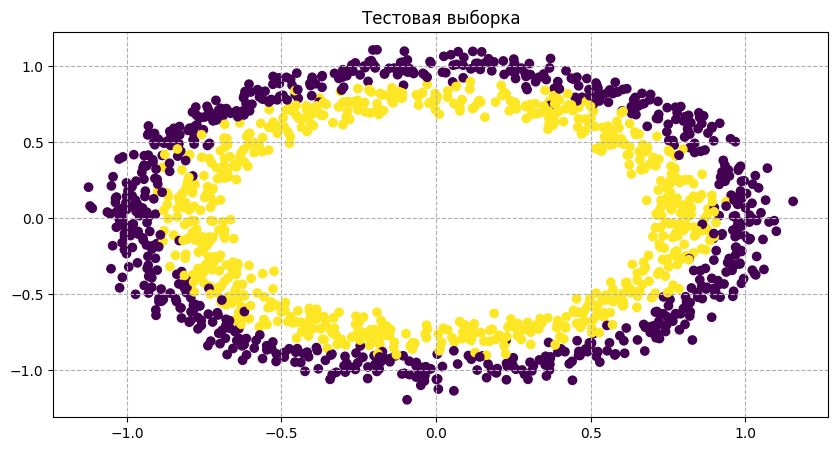

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X_t[:,0], X_t[:,1], c=y_t)
plt.title("Тестовая выборка")
plt.grid(linestyle="--")
plt.show()

In [8]:
sc = StandardScaler()
sc.fit(X_tr)
X_tr_std = sc.transform(X_tr); X_t_std = sc.transform(X_t)

In [9]:
clf = RandomForestClassifier(n_estimators =100).fit(X_tr_std, y_tr)
y_pred = clf.predict(X_t_std)


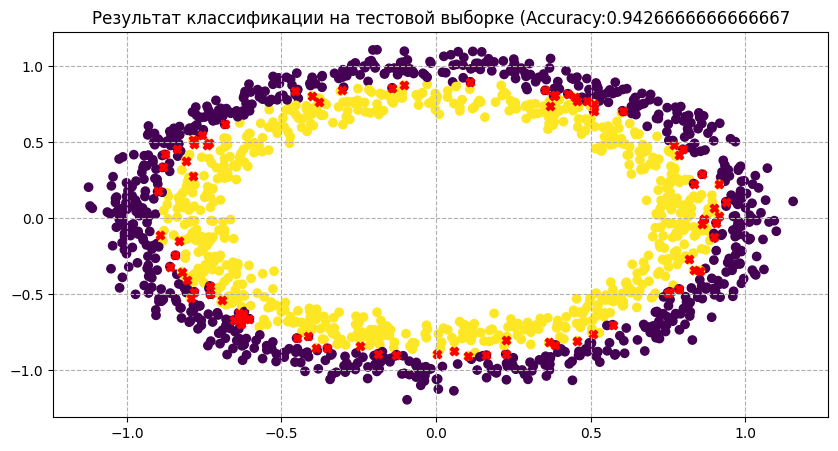

In [10]:
import matplotlib.pyplot as plt
errors = y_t != y_pred
plt.figure(figsize=(10, 5))
plt.scatter(X_t[:,0], X_t[:,1], c=y_pred)
plt.scatter(X_t[errors,0], X_t[errors,1], c='red', marker="X")
plt.title(f"Результат классификации на тестовой выборке (Accuracy:{accuracy_score(y_t, y_pred)}")
plt.grid(linestyle="--")
plt.show()

Посмотрим, можно ли увеличить оценку алгоритма. Для этого подберем в GridSearchCv гиперпараметры для Random Forest.

In [12]:
from sklearn.model_selection import GridSearchCV
import numpy as np
grid_params = {
    'n_estimators' : np.arange(100, 120, 5),#количество деревьев
'max_features': ['auto', 'sqrt', 'log2'],#Количество признаков для проверки на разделение. Стандартно- все.
'max_depth' : [3,4,5,6,7,8],#максималная глубина дерева
'criterion' : ['gini', 'entropy']#функция разделения выборки в узлах дерева
}
gs = GridSearchCV(clf, grid_params, scoring="accuracy", refit=True)
g_res = gs.fit(X_tr_std, y_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [13]:
print(g_res.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 115}


In [14]:
rf_gds = g_res.best_estimator_
rf_gds.fit(X_tr_std, y_tr)
y_pred = rf_gds.predict(X_t_std)

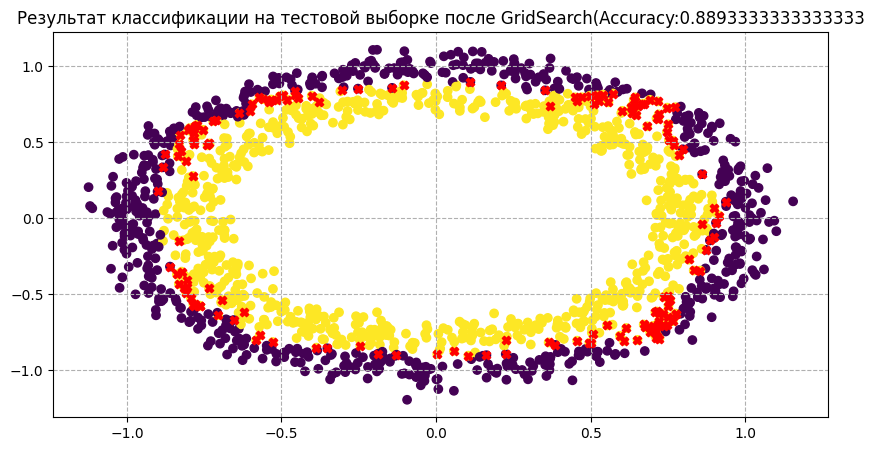

In [15]:
import matplotlib.pyplot as plt
errors = y_t != y_pred
plt.figure(figsize=(10, 5))
plt.scatter(X_t[:,0], X_t[:,1], c=y_pred)
plt.scatter(X_t[errors,0], X_t[errors,1], c='red', marker="X")
plt.title(f"Результат классификации на тестовой выборке после GridSearch(Accuracy:{accuracy_score(y_t, y_pred)}")
plt.grid(linestyle="--")
plt.show()

Accuracy получилось меньше, чем с параметрами по умолчанию. Это может свидетельствовать о переобучении модели на тренировочных параметрах